# Stanford CS229 Machine Learning Andrew Ng

- Distill key concepts into summary and cheat sheets
- Use in-line examples to relate concepts
- insert diagrams, flowcharts, and mind maps
- Rewrite concepts in your own words
- Add your own questions or comments
- Review, revise, and test yourself using your notes

## Lecture 1: General
There is an algorithm called the support vector machine that allow you to use an infinite-dimensional vector to represent data. You will learn how computers can store infinite vector of data wiout running out of memory or proecssing speed, specially the technical method called kernels, you will learn algorithms so that the inifinitely lng lists of features. <br>

Machine learning stategy: when you have a machine learning project, you have a lot decision to make, such as do you collect more data, do you try a different learning algorithm. <br>

In this course, Andrew Ng will talk about:
1) machine learning
2) machine learning strategy
3) deep learning/neural networks
4) unsupervised learning
5) reinforcement leaning

CS229 covers a much broader set of algorithms which are all useful. CS230, more narrowly covers just deep learning. <br>

Cocktail party problem is a unsepervised problem that you need to separate people's voices without labeling. And the algorithm you do this is callled ICA, independent components analysis. <br>

reinforcement learning: how to fly a helicorpter, play Atari games, Game of Go like AlphaGo. 

## Lecture 2: Linear regression (Ordinary Least Squares)
- Batch/Stochastic gradien descent is an algorithm for fitting linear regression models
- Normal equation as an efficient way to let you fit linear models.

ALVINN video, the autonomous driving video, is a supervised learning problem. <br>

Given a problem, for example a house size $x_1$, number of bedrooms $x_2$, and price problem y, how to represent the hypothesis h? $$ h(X) = \sum_{j=0}^{2} \theta_j x_j$$ where $x_0 = 1$. <br>

$$\theta = 
\begin{bmatrix}
\theta_0 \\
\theta_1 \\
\theta_2
\end{bmatrix},
\quad 
X = 
\begin{bmatrix}
x_0 \\
x_1 \\
x_2
\end{bmatrix}$$

Choose $\theta$ so that h(X) $\approx$ y for training samples.For all the m data points, you want to find a set of $\theta$ to minimize the cost function $$J(\theta) = \frac{1}{2}\sum _{i=1}^{m}(h^i(X)-y)^2$$
By convention, we put a 1/2 there because later we will take derivatives, the 1/2 will make it simpler. <br>

As to why squared error instead of absolute error, or to the power of 4 of the error, we will learn when we learn the generalization of linear regression. Linear regression is a special case of a bigger family of algorithms called generalizing your models. Using squared error corresponds to a Gaussian. <br>

How to implement an algorithm to find the value of $\theta$ that minimizes $J(\theta)$. We are going to use an algorithm called __Gradient Descent__:
- Start with some values of $\theta_i$
- Keep changing $\theta_i$ to reduce $J(\theta)$

From the initial point, you want to decide which direction to go to take a small step and keep repeating the process to find the global minimum. However, depending on your initial parameters, you can get to local minima. But for linear regression, there is no local optima. <br>

You will update $\theta_j$ by $$\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$$ where $\alpha$ is the learning rate. (Derivative of a function is to find the steepest direction of the descent) How do you set the learning rate $\theta$? There is theory and in practice. In practice, you set it to 0.01. 

$$\frac{\partial}{\partial \theta_j}J(\theta) = \sum _{i=1}^{m}(h^i(X)-y) \cdot \frac{\partial}{\partial \theta_j}\sum _{i=1}^{m}(h^i(X)-y)= \sum _{i=1}^{m}(h(X)-y) \cdot x_j$$

$$\theta_j = \theta_j - \alpha \sum _{i=1}^{m}(h(X)-y) \cdot x_j $$

Repeat until convergence. <br>

Because $J(\theta)$ is defined as the sum of squared term. Being a quadratic function, $J(\theta)$ will always look like a big bowl with no local optima. The coutours of a big bowl, this quadratic function, will be ellipsis.

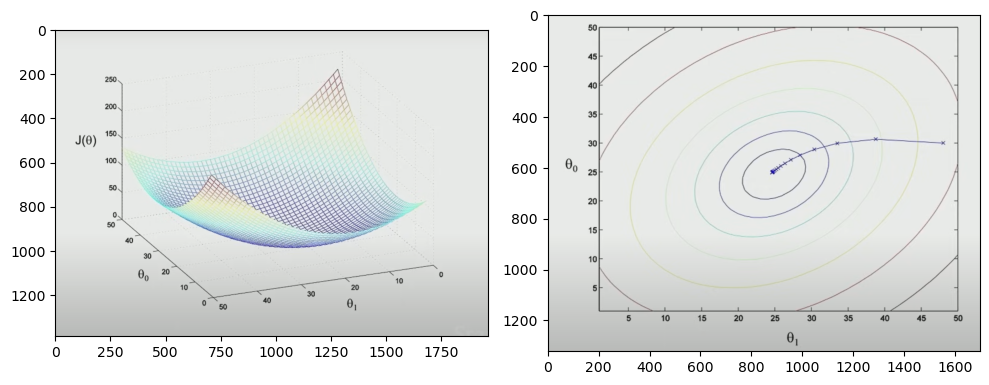

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

J_theta = mpimg.imread("J.png")
Coutour_J_theta = mpimg.imread("Coutour1.png")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Display the first image
ax[0].imshow(J_theta)

# Display the second image
ax[1].imshow(Coutour_J_theta)

# Show the images
plt.tight_layout()
plt.show()


About the choice of the learning rate $\alpha$, if it is too large, it can overshoot. If too small, you need a lot of iterations and the algorithm will be slow. Usually you try a few values and see what value allows you to most efficiently drive down the value of $J(\theta)$. <br>

Batch gradient descent: you look the entire training set. One disadvantage is that if you have a very large sample set, say millions, then for each step updating your parameters, you will need to scan your entire dataset and calculate the sum, which can be expensive. <br>

An alternative is Stochastic gradient descent, the algorithm is like: <br>
for i=1 to m, {$\theta_j = \theta_j - \alpha (h^i(X)-y^i) \cdot x_j^i $}. Instead of scanning all millions samples before updating the parameters $\theta$ even a little bit, you update $\theta_j$ using just one data point each time. If you look at the coutour map, it won't be perpendicular to the line exactly. When you update the parameters, it takes a lightly noisy random path, but on average, it is headed toward the global minimium. Stochastic gradient descent will never quite converge; it just oscilates. For batch gradient descent, it goes to the global minimum and stops right. When you have a very large dataset, Stochastic gradient descent allows you to make much faster progresses, which makes it more in practice than batch gradient descent. <br>

Is it possible to start from Stochastic gradient descent and switch to batch gradient descent? Yes. There is mini-batch gradient descent, where you use 100 examples at a time rather than one example at a time. But in practice, we rarely switch to batch gradient descent when it is very large dataset. <br>

Although you don't find the global minimum in stochastic gradient descent, it is probably still fine. Or you can reduce the learning rate over time, it is oscillating around a small area near the global minimum. But if your dataset is not huge, I would always use batch gradient descent. <br>

When do you stop with stochastic gradient desent? $J(\theta)$ is your loss function. You can plot $J(\theta)$ over time. <br>

Because linear regression has no local minimum, you run into these convergence debugging types of issues less often. When you are training highly non-linear things like neural networks, these issues becomes more acute. <br>


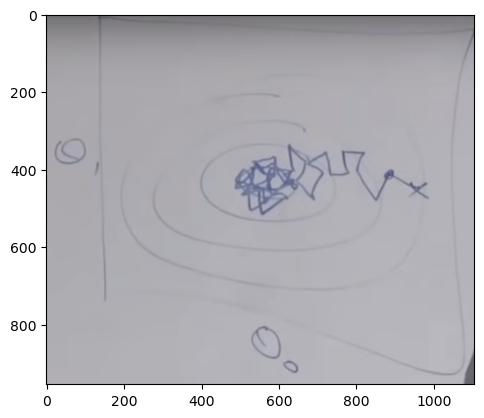

In [8]:
Coutour_J_theta2 = mpimg.imread("Coutour2.png")
plt.imshow(Coutour_J_theta2)

Both stochastic gradient descent and batch gradient descent are iterative algorithm, meaning that you take multiple steps to get near the global optimum. Turns out that there is a way to solve for the optimal value of the parameters $\theta$: normal equation. It works only for linear regression. <br>

For $X \theta = Y$, solving the euation gives you $\theta = X^{-1}Y$



## Lecture 3
- Locally weighted regression, which is a way to modify linear regression so you can fit non-linear functions.
- Probabilistic interpretation of linear regression
- Logistic regression (from probabilistic interpretation and it is first classification algorithm in the class)
- Newton's method (an algorithm)

### `Locally weighted regression`
When you have a set of data, first think of what kind of hypothesis you want to make? Is it linear as $ y = \theta_0 + \theta_1 x$, or $ y = \theta_0 + \theta_1 x + \theta_2 x^2$, or $ y = \theta_0 + \theta_1 x + \theta_2 \sqrt(x)$? If you want to do this, your algorithm would make $x_1 = x$ and $x_2 = x^2$ and so on. By defining a new feature, you can apply the linear regression algorithm we learned earlier to these type of functions. <br>

Later this class you will learn feature selection algorithms, which is a type of algorithm automatically deciding, do you want $x^2$ as a feature, or $\sqrt x $? What set of features does the best job fitting the data? <br>

In machine learning, there is parametric learning algorithm and non-parametric learning algorithm. 
Parametric learning algorithm: fit fixed set of parameters to data.
Non-parametric learning algorithm: the amount of data/parameters you need to keep grows with the size of the data. Locally weighted (linear) regression grows linearly. <br>

In linear regression, you need to look at all data and find $\theta$ to minimize the cost function $$J(\theta) = \frac{1}{2}\sum _{i=1}^{m}(y^{(i)} - \theta ^Tx^{(i)})^2$$
In locally weighted regression, you just focus on the x you are interested in and make a locally linear regression. You want to find $\theta$ to minimize the cost function $$J(\theta) = \sum _{i=1}^{m} w^{(i)}(y^{(i)} - \theta ^Tx^{(i)})^2$$ where $w^{(i)}$ is a weighting function and $w^{(i)} = exp(-\frac{(x^{(i)} - x)^2}{2 \tau^2})$ (This has a shape of Gaussian bell curve, but has nothing to do with Gaussian probability density, it does not integrate to 1). If |x^{(i)} - x| is small, $w^{(i)} \approx 1$. If |x^{(i)} - x| is large, $w^{(i)} \approx 0$. You want to make a prediction using surrounding data points. <br>

How do you choose the width? What's the neighborhood points you should use to fit the local straight line? The choice of bandwidth $\tau$ has an effect of overfitting and underfitting. You should play with $\tau$ and test how it affects the results. There are complicated ways to choose $\tau$ based on how many data points in the local region<br>

What happens if you want to infer the data value outside the scope of the dataset? You can still do it but the result may not be good. Locally linear regression is not good at extrapolation. <br>

I tend to use locally weighted linear regression when you have a relatively low dimensional dataset. <br>

### `Probabilistic interpretation of linear regression`

Why squared error, not to the fourth, or 1-norm? Why least square?

I am going to make a list of assumptions where least squares using squared error falls out naturally. 
1) Assume $y^{(i)} = \theta^T x^{(i)} + \epsilon ^{(i)}$ for ith data point, where $\epsilon ^{(i)}$ is an error term, includes unmodelled effects such as seller's mood and crime rate of the area, and random noise. <br>

2) Assume that $\epsilon ^{(i)} \sim N(0, \sigma^2)$ ($\epsilon ^{(i)}$ is distributed Gaussian with mean 0 and co-variance $\sigma^2$). Normal distribution and Gaussian distribution is the same thing. So, the probability density of 
$$ P(\epsilon ^{(i)})  = \frac{1}{\sqrt{2 \pi} \sigma} exp(-\frac{(\epsilon ^{(i)})^2}{2 \sigma ^2}) $$
This probability does integrate to 1. This is a Gaussian density. <br>

3) Another assumption we are going to make is that error terms, $\epsilon ^{(i)}$, are IID (independently and identically distributed), which is probably not true, but good enough to make the model. <br>

Under these set of assumptions, it implies that the probability of $y^{(i)}$ given $x^{(i)}$ parameterized by $\theta$ is
$$ P(y^{(i)}|x^{(i)};\theta) = \frac{1}{\sqrt{2 \pi} \sigma} exp(-\frac{(y^{(i)} - \theta^T x^{(i)})^2}{2 \sigma ^2})$$
i.e. $$y^{(i)}|x^{(i)};\theta \sim N(\theta^T x^{(i)}, \sigma^2) $$

$y^{(i)}|x^{(i)};\theta$ and $y^{(i)}|x^{(i)},\theta$ mean differently in this class. $y^{(i)}|x^{(i)},\theta$ is conditioning on $\theta$, but $\theta$ is not a random variable, so you shouldn't condition on $\theta$. $y^{(i)}|x^{(i)};\theta$ means given the set of $\theta$ value. In Statistics, there is frequency statistics and Bayesian statistics. For the purpose of machine learning, don't worry about it. Andrew Ng is just being consistent with statistics. <br>

Under the above assumptions, the likelyhood of the parameters $\theta$ equals to the probability of all observations:
$$L(\theta) = P(\vec y ^{(i)}|x^{(i)};\theta) = \Pi_{i=1}^m P(y ^{(i)}|x^{(i)};\theta)
= \Pi_{i=1}^m \frac{1}{\sqrt{2 \pi} \sigma} exp(-\frac{(y^{(i)} - \theta^T x^{(i)})^2}{2 \sigma ^2})$$

$$l(\theta) = log(L(\theta)) 
= \sum_{i=1}^m log \frac{1}{\sqrt{2 \pi} \sigma} exp(-\frac{(y^{(i)} - \theta^T x^{(i)})^2}{2 \sigma ^2})
= m \cdot log \frac{1}{\sqrt{2 \pi} \sigma} + \sum_{i=1}^m (-\frac{(y^{(i)} - \theta^T x^{(i)})^2}{2 \sigma ^2})$$

Why is error variable $\epsilon$ Gaussian? Because Central Limit Theorem from Statistics, most error distributions are Gaussian. <br>

One of the well-tested methods in statistics estimating parameters is to use maximum likelihood estimation (MLE). Choose $\theta$ to maximize $L(\theta)$. Rather tham maximize $L(\theta)$, it is easier to maximize $l(\theta)$ because log is a monotonically function. That is to maximize $\sum_{i=1}^m (-\frac{(y^{(i)} - \theta^T x^{(i)})^2}{2 \sigma ^2})$, i.e. minimize $\frac{1}{2} \sum_{i=1}^m (y^{(i)} - \theta^T x^{(i)})^2)$, which is $J(\theta)$, the cost function you saw earlier in linear regression. And it is also eqivalent to least squares. <br>

__In summary, choosing the value of $\theta$ to minimize the sum of least squared errors is just finding the maximum likihood estimate under the above assumptions that the error term is Gaussian and IID.__

### `Logistic Regression`
Logistic regression a mostly used algorithm for classification. (Don't use linear regression for classification problem. ) <br>

Logistic regression algorithm: <br>
We want the hypothesis h(x) $\in$ [0, 1]. <br>
We define $ h(x)=g(\theta^T x) = \frac{1}{1+e^{-\theta^T x}}$ <br>

Equation $g(z)=\frac{1}{1+e^{-z}}$ is a 'Sigmoid' or 'Logistic' function. <br>

When designing an algorithm, sometimes you just have to choose the form of a hypothesis. There are plenty of functions in between 0 and 1, why choose this logistic function? It turns out that there is a broader class of algorithms called generalized linear models, and this is a special case. Both linear regression and logistic function are examples of a much bigger set of algorithms derived using a broader set of principles. You will see it in Lecture 4. <br>

Let's make some assumptions about $y^{(i)}$ given $x^{(i)}$ paramerized by $\theta$. 
- if $P(y=1|x;\theta)=h(x)$, then $P(y=0|x;\theta)=1-h(x)$
- $y \in {0, 1}$ (y can only be 0 or 1)

When we combine this $ P(y|x;\theta)=h(x)^y (1-h(x))^{1-y}$ (there are more than one way to do it, plus the two terms should also work).<br>

Under the above assumptions, the likelyhood of the parameters $\theta$ equals to the probability of all observations:
$$L(\theta) = P(\vec y ^{(i)}|x^{(i)};\theta) = \Pi_{i=1}^m P(y ^{(i)}|x^{(i)};\theta)
= \Pi_{i=1}^m h(x)^y (1-h(x))^{1-y}$$

For maximum likihood estimation, we want to maximize the likelihood of the parameters $L(\theta)$. Again, we take the log form:
$l(\theta) = log (L(\theta))=  \sum_{i=1}^m y log(h(x))+\sum_{i=1}^m (1-y)log(1-h(x))$
You need to find $\theta$ to maximize the term. For that, we can use batch gradient descent. You update $$\theta_j = \theta_j + \alpha \frac{\partial}{\partial \theta_j}l(\theta)= \theta_j + \alpha \sum_{i=1}^m (y-h(x))x_j^{(i)}$$ (which is different from $\theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta)$ for linear regression because you are trying to find the maximum here, not minimum). <br>

Is there an equivalent of normal equations to logistic regression? No. There is no math equation to solve the problem. You will have to use an iterative algorithm such as gradient descent or Newton's method. <br>

Is there a local optimum when looking for $\theta$? No. The logistic function always look like a parabola shape facing down. It is a concave function. The only maximum is the global maximum. That's another reason why we choose the logistic function. 

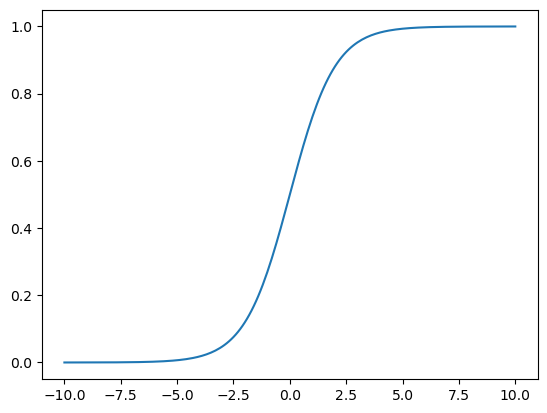

In [9]:
# plot sigmoid function
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10, 10, 201)
plt.plot(x, 1/(1+np.exp(-x)))

### `Newton's function`
Gradient descent is a good algorithm, but it takes a baby step for every iteration. It takes a lot of steps to converge. Newton's method allow you to take bigger steps and less iterations for optimizing the value of $\theta$.

The idea is to start with an initial guess, then to approximate the function by its tangent line, and finally to compute the x-intercept of this tangent line. This x-intercept will typically be a better approximation to the original function's root than the first guess, and the method can be iterated. <br>

If the tangent line to the curve f(x) at x = xn intercepts the x-axis at xn+1 then the slope is
$$ f'(x_n) = \frac{f(x_n) - 0}{x_n - x_{n+1}} $$
So, $$ x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)} $$

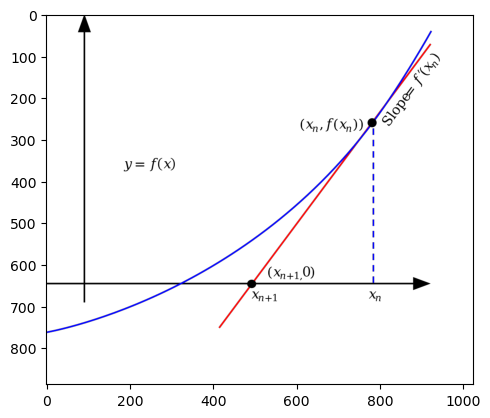

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
Newton_iteration = mpimg.imread("Newton_iteration.png")
plt.imshow(Newton_iteration)

## Lecture 4
- Perceptron Algorithm
- Exponential Family
- Generalized Linear Models
- Softmax Regression (Multiclass Regresssion)

### `Perceptron Algorithm`
Perceptron Algorithm is not widely used in practice. It is studied for historic reasons. It is nice and simple. 

Logistic regression uses the sigmoid function has the y between 0 and 1. You can also think of a variant of it as a Peceptron, where y=0 of x<0, and y=1 if x$\geq$0. We define the hypothesis $ h(x)=g(\theta^T x) $. <br>

Like logistic regression, you update $$\theta_j = \theta_j + \alpha \sum_{i=1}^m (y^{(i)}-h(x^{(i)}))x_j^{(i)}$$ <br>

$y^{(i)}-h(x^{(i)})$ can be 0 if you get it correct, or $\pm 1$ if you mis-classify (1 when y=1, -1 when y=0). Basically, depending on how you misclarify it, the updating term of $\theta$ is
$$\theta_j = \theta_j \pm  \sum_{i=1}^m \alpha x_j^{(i)}$$
If  y=1, we want $\theta \approx x$; if y=0, we want $\theta \not \approx x$. When two vectors are similar, their dot product is positive. When two vectors are not similar, the dot product is negative. <br>

Why peceptron algorithm is not used in practice? It doesn't have a probabilistic interpretation. You can have a geometric feel of what's happening with the hyperplane but it doesn't have a probabilistic interpretation. 

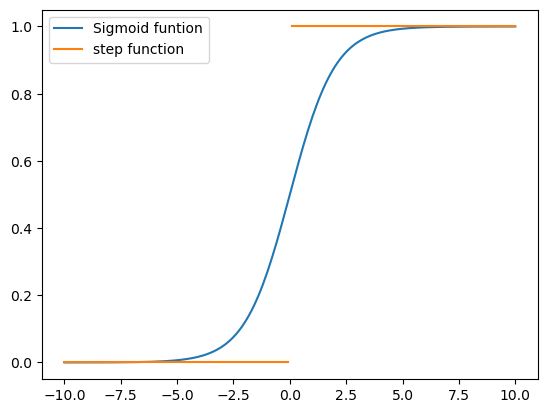

In [21]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-10, 10, 201)
plt.plot(x, 1/(1+np.exp(-x)), label='Sigmoid funtion')

#y = [0 if val < 0 else 1 for val in x]
y = np.where(x < 0, 0, np.where(x > 0, 1, np.nan))
plt.plot(x,y, label='step function')
plt.legend()

### `Exponential Family`
probability density function and probability mass function: <br>
A probability density function (PDF) is used to describe the probability distribution of a continuous random variable, where the probability of an event occurring within a specific range is calculated by finding the area under the curve within that range; while a probability mass function (PMF) is used for discrete random variables, directly assigning a probability to each possible value the variable can take on, meaning the probability of an event is simply the value of the function at that point. <br>

PDF can be written in the form 
$$ P(y; \eta) = b(y) \cdot exp(\eta T(y) - a(\eta)) = b(y) \frac{e^{\eta T(y)}}{e^{a(\eta)}} $$
where y: data, $\eta$ natural parameter, T(y) sufficient statistic, b(y) base measure, $a(\eta)$ log partition function. <br>
You can think of $ e^{a(\eta)}$ as a normalizing constant of the distribution such that the whole thing of PDF integrates to 1. The log of $ e^{a(\eta)}$ is just $a(\eta)$, that's why it is called the log of the partition function. <br>

To show that a distribution is in the exponential family, the most starightforward way to do it is to write out the PDF of the distribution in a form that you know, and try to match the exponential family form of equation. <br>

__Bernoulli distribution__ is used to model binary data. It has a parameter $\phi$ that whether a event happens or not. 
$$ p(y;\phi) = \phi^y(1-\phi)^{1-y}$$
(This is a mathmatical way to represent an if-else that you would do in programming) <br>
Now we rewrite the PDF to make it in the exponential family form.
$$ p(y;\phi) = \phi^y(1-\phi)^{1-y} = exp (log \phi^y(1-\phi)^{1-y}) = exp[log\frac{\phi}{1-\phi}y + log(1-\phi)]$$
So, b(y)=1, $\eta = log\frac{\phi}{1-\phi}$ ($\phi = \frac{1}{1+e^{-\eta}}$), T(y)=y, $a(\eta) = log(1-\phi) = log(1+e^\eta)$.
The form of $\phi$ looks like Sigmoid function and it is no coincident. Will be explained later. <br>

Another example is __Gaussian distribution__ with a fixed variance is also in the Exponential family.
Assume variance $\sigma^2 =1$. Then $$ P(y;\mu)= \frac{1}{\sqrt{2 \pi} \sigma} exp(-\frac{(y-\mu)^2}{2 \sigma ^2}) 
= \frac{1}{\sqrt{2 \pi}} exp(-\frac{(y-\mu)^2}{2}) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{y^2}{2}} exp(\mu y -\frac{\mu^2}{2}) $$

__Properties of exponential family__:
- MLE with respect to $\eta$ is concave. (If we perform maximum likihood on the exponential family. When the expoential family is parameterized on the natural parameters, the optimization problem is concave. Similarly, the cost function, the negative log likelihood is convex.)
- $E(y; \eta) = \frac{\partial a(\eta)}{\partial \eta} $
- $Var(y; \eta) = \frac{\partial^2 a(\eta)}{\partial \eta^2} $

Depending on the dataset you have, you can choose a member of the exponential family.
- if you have real value data, you use a Gaussian; <br>
- binary, Bernouli; <br>
- count (non negative integers): Poisson; <br>
- positive real value data $R^+$, you use Gamma or exponential distribution. <br>
- Probability distribution over probability distribution: Beta, Dirichlet

### `Generalized Linear Models`
Assumptions we are going to make for GLM:
1) $y|x;\theta$ is in the exponential family $(\eta)$
2) $\eta = \theta^Tx$, $\theta \in \mathbb{R}^n $, $x \in \mathbb{R}^n $
3) During test, given a x, the output $h(x)=E[y|x;\theta]$

We are training data to get the parameter of the exponential family, whose mean is the prediction for the output y. The parameters we are learning using gradient descent is $\theta$. During learning, what we do is maximum likelihood. 

No matter what distribution you are doing, the learning update rule is the same:
$$\theta_j = \theta_j + \alpha \sum_{i=1}^m (y^{(i)}-h(x^{(i)}))x_j^{(i)}$$
You can apply this learning rule without having to figure out what the gradient and loss are. 

Newton's method is probably the most common you would use with GLMs, assuming the dimensionality of your data is not extremely high. If the features is less than a few thousand. <br>

$\eta$ is a natural parameter, the fucntion that links the natural parameter to the mean of the distribution $E[y;\eta]=g(\eta)$ is called cononical response function. <br>

We have three parameters: model paramaeters ($\theta$), natural parameters ($\eta$), and canonical parameters ($\mu \sigma^2$ for Gaussian, $\phi$ for Bernoulli, and $\lambda$ for Poisson). Whenever we are learning a GLM, it is only model parameters we are learning. The connection between model parameters and natural parameters is linear. $\theta^Tx$ gives you the natural parameter. Between natural parameter and canonical parameter, there is function g to get canonical parameters from natural parameters, and g inverse ($g^{-1}$) from canonical to natural parameters. <br>

For logistic regression, $h(x)=E[y|x;\theta] = \phi = \frac{1}{1+e^{-\theta^Tx}}$


### `Softmax Regression (Multiclass Regresssion)`
It is also a member of the GLM. Cross entropy <br>
Softmax regression (or multinomial logistic regression) is a generalization of logistic regression to the case where we want to handle multiple classes. <br>

Label of y is a one-hot vector. For example there are three classes, the label would be [1 0 0 ], [0 1 0], or [0 0 1]. Each element in the vector corresponds to one of the classes. 

Our goal is to get a probability distribution of each class. In order to do that, we take the exp of $\theta^Tx$ to make them positive, then normalize the data by dividing the sum ($\sum_i^m e^{\theta^Tx}$) to get the distribution over all the classes. <br>

The cross entropy of $(P, \hat{P}) = - \sum \limits_y P(y) \; log \hat{P}(y) = -log \hat{P}(y) = -log \frac{e^{\theta^Tx}}{\sum e^{\theta^Tx}}$. The you treat this as the loss and do gradient descent with respect to the parameters.

Look up the interpretation of cross entropy. 

## Lecture 5 - GDA & Naive Bayes

Last week you heard about linear regression and generalized linear models. Actually all the learning algorithms we have learned so far is called discriminative learning algorithms. <br>
Today we will learn how generative learning algorithms work. In particular, we will learn:
1) Gaussian discriminant analysis (GDA)
2) Comparison between generative learning algorithms and discriminative algorithms
3) Naive Bayes and how you can use it to build a spam filter for instance

### `Gaussian discriminant analysis (GDA)`
Compared to logistic regression, GDA is more simpler and efficient algorithm to implement in some cases. It works better if you have smaller datasets. <br>

If you have two datasets, discriminative algorithms will try to find a line to separate the two datasets using gradient descent. Logistic regression searches for a line, a decision boundary. Generative learning algorithm isn't trying to maximize the likelihood. Rather than looking at two classes and trying to find the separation; the algorithm looks at each class one at a time and try to build a model, then look at another class in isolation. At classification time, for a data point with features, it will compare itself with different models and see which one is similar with its own features. Discriminative learning algorithm learns P(y|x), and generative learning algorithm learns P(x|y) and P(y), which is called a classs prior.<br>

Bayes rule: $$ P(y=1|x) = \frac{P(x|y=1) \; P(y=1)}{P(x)} $$
$$ P(x) = P(x|y=1)P(y=1) + P(x|y=0)P(y=0)$$
The generative learning algorithm lears P(x|y) and P(y), you plug in the results to the above equations. <br>

Suppose $ x \in \mathbb{R}^n $ (drop $x_0 = 1$)
The key assumption for Gaussian discriminant analysis is that P(x|y) is Gaussian. 
Malti-variant Gaussian and uni-variate Gaussian. A multi-variant Gaussian has multiple variables.

If $z \sim N(\vec{\mu}, \Sigma) $, $z \in \mathbb{R}^n$, $\vec{\mu} \in \mathbb{R}^n$, and $ \Sigma \in \mathbb{R}^{n \times n}$, <br>
the expected value of z: $E(z) = \mu $, $cov(z) = E[(z-\mu)(z-\mu)^T] = Ezz^T - Ez \; Ez^T $ <br>

The probability of a Gaussian looks like this: 
$$ P(z)= \frac{1}{(2 \pi)^{n/2} \; |\Sigma|^{1/2}} exp(-\frac{1}{2} (x- \mu)^T \; \Sigma^{-1} (x-\mu)) $$

So the multivariant gaussian density has two parameters, $\mu$ and $\Sigma$. 

For GDA, we need to model P(x|y). For example the malicious and begign tumors that has label 1 or 0. The parameters of the Gaussian distribution is $\mu_0$, $\mu_1$, covariance $\Sigma$, and $\phi \in \mathbb{R}$. We use differnt means but the same covariance. The reason? If you choose to build the model this way, the decision boundary will be linear. For a lot of problems, you want a linear decision boundary. 
$$ P(x|y=0)= \frac{1}{(2 \pi)^{n/2} \; |\Sigma|^{1/2}} exp(-\frac{1}{2} (x- \mu_0)^T \; \Sigma^{-1} (x-\mu_0)) $$
$$ P(x|y=1)= \frac{1}{(2 \pi)^{n/2} \; |\Sigma|^{1/2}} exp(-\frac{1}{2} (x- \mu_1)^T \; \Sigma^{-1} (x-\mu_1)) $$
$P(y)=\phi^y \;(1-\phi)^{1-y} $ for Bernoulli distribution with $ P(y=1)=\phi $ <br>

By training the data, you can get all the four parameters, then P(x|y) and P(y). By using Bayes rule, you can compute the P(y|x) given features. <br>

For a training set {(x^{(i)}, y^{(i)}), i=1 to m. For a general learning algorithm, the joint likelihood 
$$ L(\theta, \mu_0, \mu_1, \Sigma) = \prod \limits_{i=1}^m P(x^{(i)}, y^{(i)}; \theta, \mu_0, \mu_1, \Sigma) = \prod \limits_{i=1}^m P(x^{(i)} \mid y^{(i)}) P(y^{(i)}) $$

Compare to a discriminative learning algorithm, it is a conditional likelihood
$$ L(\theta) = \prod \limits_{i=1}^m P(y^{(i)} \mid x^{(i)}; \theta) $$

If you use maximum likelihood estimation, you choose $\theta, \mu_0, \mu_1, \Sigma $ to maximize
$$ l(\theta, \mu_0, \mu_1, \Sigma) = log \; L(\theta, \mu_0, \mu_1, \Sigma) = log \; \prod \limits_{i=1}^m P(x^{(i)}, y^{(i)}; \theta, \mu_0, \mu_1, \Sigma) = log \;\prod \limits_{i=1}^m P(x^{(i)} \mid y^{(i)}) P(y^{(i)}) $$
You will get $$\phi = \frac{\sum_{i=1}^m y^{(i)}}{m}$$
$$\mu_0 = \frac{\sum \limits_{i=1}^m \mathbb{1}({y^{(i)} = 0)} x^{(i)}}{\sum \limits_{i=1}^m \mathbb{1}{{y^{(i)} = 0}}}$$
$$\mu_1 = \frac{\sum \limits_{i=1}^m \mathbb{1}({y^{(i)} = 1)} x^{(i)}}{\sum \limits_{i=1}^m \mathbb{1}{{y^{(i)} = 1}}}$$
$$\Sigma = \frac{1}{m} \sum \limits_{i=1}^m (x^{(i)} - \mu_{y^{(i)}}) (x^{(i)} - \mu_{y^{(i)}})^T $$
The covariance matrix basically tries to fit coutours to the ellipse, try to fill the Gaussian with different means but you want one covariance matrix to both. 

When prediction, $$ arg max_y P(y \mid x) = arg max_y \frac{P(x \mid y)P(y)}{P(x)} = arg max_y P(x \mid y)P(y) $$

Compare GDA to logistic regression:
for a fix set of parameters $\theta, \mu_0, \mu_1, \Sigma$, let's plot $P(y=1 \mid x; \theta, \mu_0, \mu_1, \Sigma)$ as a function of x.
$$P(y=1 \mid x; \theta, \mu_0, \mu_1, \Sigma) = \frac{P(x \mid y=1; \mu, \Sigma) P(y=1; \phi)}{P(x; \phi, \mu_0, \mu_1, \Sigma)}
= \phi \frac{P(x \mid y=1; \mu, \Sigma)}{P(x; \phi, \mu_0, \mu_1, \Sigma)}$$

Let's look at the same dataset and compare what general learning algorithm and discriminative learning algorithm will do on this dataset. 

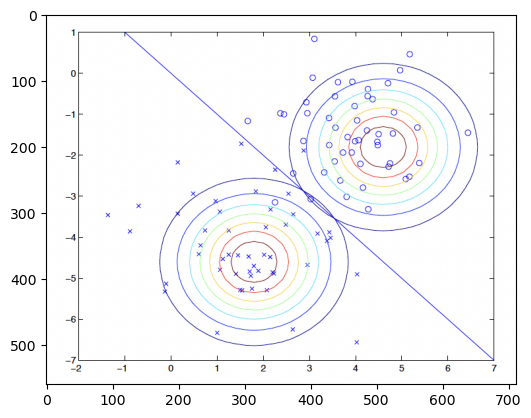

In [51]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
GDA = mpimg.imread("GDA.png")
plt.imshow(GDA)

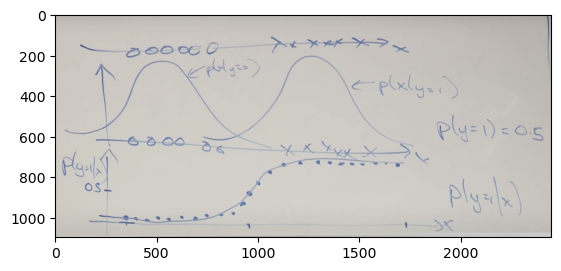

In [53]:
GDA_sigmoid = mpimg.imread("GDA_Sigmoid.png")
plt.imshow(GDA_sigmoid)

Both logistic regression and GDA actually end up using a sigmoid function to calculate P(y=1 | x). <br>

When a generative algorithmlike GDA is superior and when a distributed algorithm like logistic regression is superior? <br>
GDA assumes 1) $x|y=0 \sim N(\mu_0, \Sigma)$, 2) $x|y=1 \sim N(\mu_1, \Sigma)$, 3) $y \sim Bernoulli(\phi)$ <br>
Logistic regression assumes $ P(y=1|x) = \frac{1}{1+e^{-\theta^Tx}} $, with $x_0 =1$ <br>

The plot above indicates that from the assumptions of the GDA you can get the assumption of logistic regression, but the reverse doesn't stand; which means that the GDA has stronger assumptions. What you see in a lot of learning algorithms is that if you make strongly modeling assumptions and the assumptions are roughly correct, then your model will do better because you are telling more information to the algorithm. If the assumptions of GDA are correct, GDA will do better. <br>

if 1) $x|y=0 \sim Poisson(\lambda_0)$, 2) $x|y=1 \sim Poisson(\lambda_2)$, 3) $y \sim Bernoulli(\phi)$ <br>, these will also lead to the conclusion that P(y=1|x) is logistic. <br>

Actually this is true for any exponential family distribution. If 1) $x|y=0$ is from an exponential family distribution, 2) $x|y=1$ is from the same exponential family distribution just with different natural parameters$, 3) $y \sim Bernoulli(\phi)$ <br>, these will also lead to the conclusion that P(y=1|x) is logistic. <br>

If you don't know if your data is Gaussian or Poisson, if you are using logistic, you don't need to worry about it. It will work fine either way. If your model is Poisson but you assumed Gaussian, it may do poorly. <br>

With a large dataset, I will probably choose logistic regression because with more data you can overcome telling the algorithm less about the world. GDA is computaionally efficient. <br>

It is recommended that you do some cyclical tests to see if it is Gaussian. But in practice, if you have enough data to do a cyclical test and gain conviction, you probably have enough data to just do logistic regression. <br>

__When you have like 100 samples, the skill in designing your learning algorithm matters much more than having a lot of data. When you have less data the algorithm needs to reply more on assumptions you code in.__

One more generative learning algorithm: __Naive Bayes__.
An example is the emal spam filter. Naive Bayes takes the text and scan the features x. Look at yout first 10,000 re-occuring words and use that as a feature set. You take an email and turn it into a binary feature vector. The feature vector is {0, 1}^n because it is n dimensional binary feature, and n=10,000 in this example. You want to model P(x|y), P(y). There are $2^{10,000}$ possible values of x. So we need $2^{10,000}$-1 parameters. Modeling this without additional assumptions won't work because of the excessive number of parameters. <br>

In the Naive Bayes models, we assume $x_i$ are conditionally independent given y.
$P(x_1, ...x_{10,1000} |y)=P(x_1|y)P(x_2|x_1,y)P(x_2|x_1,x_2,y)...P(x_{10,000}|...)$ (this equation is always true).
Assume $P(x_1|y)P(x_2|x_1,y)P(x_2|x_1,x_2,y)...P(x_{10,000}|...)=P(x_1|y)P(x_2|y)P(x_2|y)...P(x_{10,000}|y)=\prod \limits_{i=1}^{10,000} P(x_i|y)$ and this assumption is called conditional independent assumption. It is also sometimes called the Naive Bayes assumption. 
If your sample is Gaussian, you can probably get away with it. But if it is not Gaussian, it may not be so horrible that you can't get away with it. This equation is all you need to derive Naive Bayes.<br>

If you are familiar with probabilistic graphic models, if you took CS228, this assumption is summarizing this picture: once you know the class label is a spam or not spam, whether or not each word appears is independent. <br>

Parameters of this model:
$\phi_{j|y=1}=P(x_j=1|y=1)$, $\phi_{j|y=0}=P(x_j=1|y=0)$, and what is the cost prior, $\phi_y = P(y=1)$, what is the probability that the enxt email you receive is spam. <br>

To fit the parameters of this model, similar to GDA, you write down the joint likelihood:
If you use maximum likelihood estimation, you choose $\theta, \mu_0, \mu_1, \Sigma $ to maximize
$$ l(\phi_y, \phi_{j|y}) = log \; L(\phi_y, \phi_{i|y}) = log \; \prod \limits_{i=1}^m P(x^{(i)}, y^{(i)}; \phi_y, \phi_{j|y}) = log \;\prod \limits_{i=1}^m P(x^{(i)} \mid y^{(i)}) P(y^{(i)}) $$
You will get 
$$\phi_y = \frac{\sum \limits_{i=1}^m \mathbb{1}({y^{(i)} = 1)}}{m}$$
$$\phi_{j|y=1} = \frac{\sum \limits_{i=1}^m \mathbb{1}({x_j^{(i)} = 1, y^{(i)} = 1)}}{\sum \limits_{i=1}^m \mathbb{1}{{y^{(i)} = 1}}}$$

This is Naive Bayes for email spam classification. If you use logistic regression for spam classification, you do better than this almost all the time. But this is a very efficient algorithm because estimating these parameters is just counting andcomputing probabilities is just multiplying a bunch of numbers. There is nothing iterative about the models. So you can fit this model very efficiently. The problem is what if you get zeros in some of the equations.

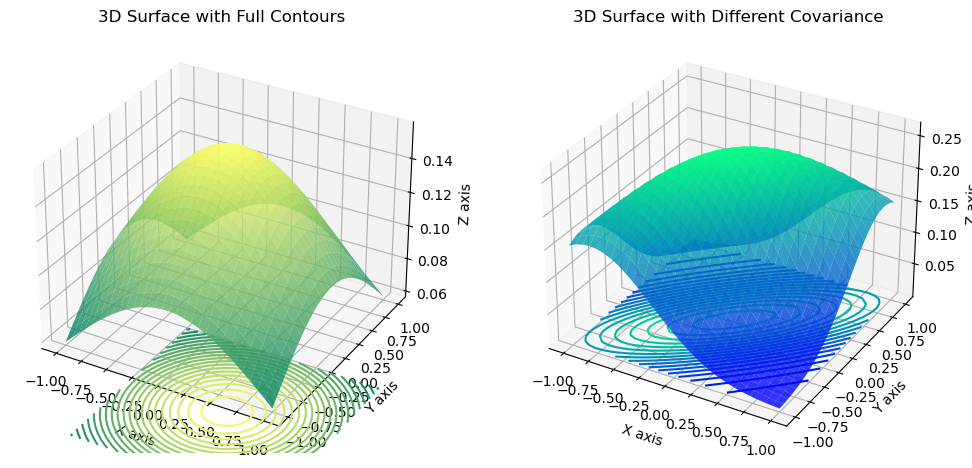

In [52]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.stats import multivariate_normal

# Generate grid
x, y = np.mgrid[-1.0:1.0:30j, -1.0:1.0:30j]
xy = np.column_stack([x.flat, y.flat])

# Define mean and covariance matrices
mu = np.array([0.0, 0.0])
Sigma = np.eye(2)
Sigma2 = np.array([[1, 0.8], [0.8, 1]])

# Compute PDFs
z = multivariate_normal.pdf(xy, mean=mu, cov=Sigma).reshape(x.shape)
z2 = multivariate_normal.pdf(xy, mean=mu, cov=Sigma2).reshape(x.shape)

# Create the figure
fig = plt.figure(figsize=(12, 6))

# First 3D plot with projections
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(x, y, z, cmap='summer', alpha=0.8)
# Project contours to x=0, y=0 planes
ax1.contour(x, y, z, 20, cmap='summer', offset=0, linewidths=1.5)
ax1.contour(x, y, z, 20, cmap='summer', offset=-1.2, linewidths=1.5)
ax1.contour(x, y, z, 20, cmap='summer', offset=1.2, linewidths=1.5)

ax1.set_title('3D Surface with Full Contours')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')

# Second 3D plot with different covariance matrix and projections
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(x, y, z2, cmap='winter', alpha=0.8)
# Project contours to x=0, y=0 planes
ax2.contour(x, y, z2, 20, cmap='winter', offset=0, linewidths=1.5)
ax2.contour(x, y, z2, 20, cmap='winter', offset=-1.2, linewidths=1.5)
ax2.contour(x, y, z2, 20, cmap='winter', offset=1.2, linewidths=1.5)

ax2.set_title('3D Surface with Different Covariance')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')

plt.show()



## Lecture 6 Support Vector Machines
- Naive Bayes
    - Laplace smoothing (different versions of Naive Bayes)
    - Event models (different versions of Naive Bayes)
- Advice about applying machine learning algorithm
- SVM intro

One problem of Naive Bayes is that if you receive an email that has the key word that you have never seen before in your training data set, you will get a probability 0/0, which is not correct. One way to address this problem is the Laplace smoothing. <br>

An example is that a football game lost 4 games a year and hasn't won any. So $ P(y=1)=\frac{\#1s}{\#1s + \#0s} = 0$. Instead of saying there is no chance for the team to win their next game, Laplace adds 1 to each. $ P(y=1)=\frac{\#1s +1}{\#1s +1  + \#0s + 1} = 1/6$ <br>

When you get an email, to know if it is a spam or not, Multi-variate Bernoulli event model give you the x a 10,000 vector with either 1 or 0, meaning the word existing or not in your dictionary. The multinomial event model, instead, use a vector of words number in the email. For example there are 10 words in the email, it will be a vector of 10, each being the index of the word in the dictionary (from 1 to 10,000). With this new model, we are going to build a generative model $P(x,y)=P(x|y)P(y) $. Assume $ P(x|y)=\prod_{j=1}^n P(x_j|y) $. This is exactly the same equation we saw for Naive Bayes. However,  but the multinomial event model, the definition of $x_j$ and n are very different. $P(x_j|y)$ is now a multinomial probability instead of binary or Bernoulli. __Parameters $\phi_y$ and $\phi_{k|y=0}$ that I don't understand the equation.__ <br>
$$\phi_{k|y=1}= P(x_j = k|y=1)$$

MLE: what is the chance of some word in a non-spam email being the word 'drugs'
$$\phi_{k|y=0} = \frac{\sum \limits_{i=1}^m \mathbb{1}({y^{(i)} = 0) }  \sum \limits_{j=1}^n \mathbb{1}({x_j^{(i)} = k)} +1}{\sum \limits_{i=1}^m (\mathbb{1}{{y^{(i)} = 0) \; n +10,000}}}$$

What to do if the word is not in your dictionary? There are twi approaches. One is to just to ignore it. Second take the special word and map them to a special token which traditonally denoted UNK for unknown words. <br>

Naive algorithm is not very competetive compared to other algorithms. Logistic regression will work better in higher accuracy than Naive Bayes. The advantage of Naive Bayes is that it is efficient and quick to implement. <br>

When you work on a machine learning project, start with something quick and dirty. Train the data quickly and see how it performs, do error analysis, use that to deep out the algorithm. <br>

There is a technique called word-embedding that will know which words are similar to each other. It is taught in CS230. NLP class

Support Vector Machine can help us find non-linear separation boundaries. If you have two features x1, x2, and two different groups that have non-linear boundary. Logistic regression can do this by take your feature x1, x2 and map it to a high dimensional feature vector, such as $\phi(x)=[ x_1, x_2, x_1^2, x_2^2, x_1x_2]$. The decision boundary will be ellipse shape. But manualy choose the feature can be to much work. Another advantage of SVM is that it doesn't have a lot of parameters, not like learning rate to tune in. SVM is not effective as neural networks for many problems,one great point of SVM is turn key. <br>

Optimal margin classifier is the building block of SVM. Kernel is one of the powerful ideas in machine learning. You can map feature vector x to higher dimensional (can even be infinity dimensional). You don't have to fiddle the features too much. <br>

Fuctional margin of the classifier: Let's start with logistic regression using Sigmoid function. $h(x)=g(\theta^Tx)$. Predict 1 if $\theta^T x \geq 0$ $(h(x)\geq 0.5$), otherwise 0. If $y^{(i)} = 1$, hope that $\theta^T x^{(i)} \gg 0$. If $y^{(i)} = 0$, hope that $\theta^T x^{(i)} \ll 0$. If a classifier has a large functional margin, it means that the last two statements are true. <br>

Geometric margin: suppose two groups are linear separable. There might be different ways separating the data sets. We are going to build an optimal margin classifier that tries to maximize the geometric margin. What the rudimentary SVM and low-dimensional spaces will do, also called the optimal margin classifier, is pose an optimization problem to try to find a separation line. <br>

For SVM, we will use {-1, 1} to denote the two groups. h the output also {-1, 1}. g(z)=1 if $z \geq 0$, -1 otherwise. Instead of a smooth transition from 0 to 1, we use abrupt transition from -1 to 1. <br>

Previsouly for $h_\theta(x)=g(\theta^T x)$ that $\theta \in \mathbb{R}^{n+1}$ and $x_0 = 1$. For SVM, $h_{w,b}(x)=g(w^Tx+b) =\sum \limits_{i=1}^n w_ix_i+b_i$ that $ w \in \mathbb{R}^n $, $b \in \mathbb{R}$, drop $x_0 = 1$. <br>

The function margin of the hyperplane defined by (w,b) with respect to $(x^{(i)}, y^{(i)})$. $\hat \gamma^{(i)} = y^{(i)} (w^T x^{(i)}+b)$. What we want is to have a large functional margin. So, if $y_i =1$, what we want is $w^T x^{(i)}+b \gg 0$; and if  $y_i =-1$, what we want is $w^T x^{(i)}+b \ll 0$. Basically, you want $\hat \gamma^{(i)} \gg 0$ . If $\hat \gamma^{(i)} \gg 0$, that means $h(x^{(i)}) = y^{(i)}$. Functional margin with respect to training set $\hat \gamma = min_i \; \hat \gamma^{(i)}$, and i is training examples. <br>

Geometric margin: the Euclidean distance of a data point to the separating line that $w^T x = 0$, $\gamma^{(i)} = \frac{w^T x^{(i)}+b}{\|w\|} $. But more generally, your define $\gamma^{(i)} = \frac{y^{(i)} (w^T x^{(i)}+b)}{\|w\|} $. The geometric margin with respect to traing set is $\gamma = min_i \gamma^{(i)}$. We again use the worst case notion. The relation between the functional margin and the geometric margin is by a factor of $\|w\|$. <br>

What the optimal margin classifier does is to choose w, b to maximize $\gamma$. You want to maximize $\gamma$ s.t. $\frac{y^{(i)} (w^T x^{(i)}+b)}{\|w\|} \geq \gamma $, i=1, ...m. This is a convex optimization problem, so it is hard to solve it without a gradient descent and initially known local optima and so on. You can turn this problem into minimize $\|w\|$ s.t. $ y^{(i)} (w^T x^{(i)}+b) \geq 1 $. <br>

This is the baby SVM. We will add kernals to it then you will have the full complexity of the SVM norm.

SVM is like turn key. You just run it and it more or less works.

## Lecture 7 - Kernels

- Optimization problem
- Representer theorem
- Kernels

Optimal margin clasifier and plus kernel is SVM. <br>

$x^{(i)} \in \mathbb{R}^100$, suppose $w=\sum \limits_{i=1}^m \alpha_i  y^{(i)} x^{(i)}$ (w is a linear combination of samples, $y^{(i)} = \pm 1$).Let's explain less formally where this is a reseasonable assumption. Actually, the representer theorem proves that this is just true at the optimal value of w. <br>

Explanation 1: consider logistic regression, the gradient descent
$$\theta_j  = \theta_j + \alpha (y-h(x))x_j^{(i)}$$
If you use batch gradient descent, the updating rule is:
$$\theta_j = \theta_j + \alpha \sum_{i=1}^m (y-h(x))x_j^{(i)}$$
(check if it is plus or minus) <br>

Explanation 2: geometrical explanation <br>